#  <center>Cirugía RYGB (Roux-en-Y Gastric Bypass)</center>

# ¿Qué es la cirugía RYGB (Roux-en-Y Gastric Bypass)?
Es una cirugía de peso malabsortiva y restrictiva que ha sido practicada durante más de 30 años proporcionando un buen equilibrio entre la pérdida de peso y los efectos secundarios controlables. Se basa en separar una pequeña bolsa del estómago en la parte superior que es, a continuación, conectada con una extremidad del intestino delgado (yeyuno). Esta redirección disminuye la cantidad de comida que el paciente puede ingerir (restrictiva), a la vez que pasa por alto gran parte del estómago y una porción de intestino, disminuyendo la superficie de absorción de nutrientes (malabsortiva). 


# Nuestros datos
Esta base de datos curada proviene de una inicial de 853 pacientes operados en la Clínica Universidad de Navarra (CUN) de este tipo de bypass gástrico entre los años 2000 y 2022. Antes de la cirugía, se recopiló información antropométrica y bioquímica recogida en un grupo de variables basales (indicado en el propio nombre). Tras la cirugía, estas mismas variables se recopilaron en sucesivas visitas de seguimiento (1 mes, 3 meses, 6 meses, 9 meses, 12 meses, 15 meses, 18 meses, 24 meses, 3 años, 4 años y 5 años). 


# Nuestro objetivo
Ser capaces de predecir si el resultado de la cirugía va a ser o no satisfactorio, una clasificación binaria éxito (1) / fracaso (0).  Según literatura, los valores mínimos de pérdida de peso tras cirugía se suelen alcanzar en el intervalo 12-18 meses, por lo que se seleccionaron las variables a 18 meses para la determinación de la etiqueta (label) con la que categorizar a los pacientes.
Lo primero que esto requiere es la definición de qué significa exactamente que la cirugía haya sido un éxito. Se trata de un concepto complicado, respecto al que ni cirujanos o endocrinos se ponen de acuerdo. Siguiendo las guías clínicas, se decidió aplicar dos criterios y analizar los datos paralelamente en base a cada uno de ellos:

Con el BMI (body mass index = IMC)
BMI 18M = peso 18M (Kg) / altura (m) 2
1.	**BMI final**< 30 Kg/m2 = ÉXITO (1)
2.	**BMI** > 30 Kg/m2 = FRACASO (0)

Con el EWL (excess weight loss)
Siendo el EWL la proporción del peso sobrante que se ha perdido tras la cirugía.
EWL 18M = (peso basal – peso 18M) / (peso extra basal), siendo peso extra basal = peso basal – peso ideal
1.	**Hombres**: aprox. 0.65%
o	>= 0.65% ÉXITO (1)
o	<= 0.65% FRACASO (0)
2.	**Mujeres**: aprox. 75%
o	>= 0.75% ÉXITO (1)
o	<= 0.75% FRACASO (0)

Las dos bases de datos proporcionadas son, por tanto, iguales salvo por esta etiqueta que clasifica según el éxito de la cirugía. En rygb_basedata_18M_bmi.csv representada en la columna “label_BMI_18M”, y en rygb_basedata_18M_ewl.csv en “label_EWL_18M”.
Cabe mencionar que los datos iniciales contaban con una elevada proporción de “missing values” ya fuese porque no se incluyeron en las historias clínicas o porque el paciente no acudió a la revisión correspondiente. Una primera aproximación consistió en simplemente eliminar aquellas filas para las que no hubiese datos a los 18 meses. Como la n se veía drásticamente reducida, se decidió imputar el dato de peso a los 18 meses (necesario para el cálculo de ambas etiquetas) con las trayectorias de peso para ese mismo paciente durante revisiones anteriores a las que sí hubiese acudido. Tras el curado, la n pasó de 853 a 399 pacientes. 


# Variables

- **Peso_Kg_Ideal:** calculado para cada paciente siguiendo las recomendaciones del "American Society for Bariatric Surgery Standards Committee"

- **Weight_impt:**
  - 1: paciente con dato de peso a los 18 meses imputado
  - 0: paciente con dato de peso a los 18 meses presente en la base de datos original

- **Pie_asa_Basal:** longitud en cm de intestino que se salta con el bypass (a mayor pie de asa, más invasiva la cirugía)

- **ICC_Basal:** índice cintura-cadera (perímetro de cintura cm / perímetro cadera cm)

- **RQ_Basal:** cociente respiratorio. Volumen de dióxido de carbono (CO2) liberado sobre el volumen de oxígeno (O2) absorbido durante la respiración. Es un número adimensional

- **REE_real_Basal / REE_teorico_Basal:** requerimiento energético. El real se determina por calorimetría indirecta y el teórico en base a unas fórmulas preestablecidas según actividad física diaria.

- **perfil_diabetico:**
  - NG: normoglucémico
  - IGT: resistente a la insulina
  - T2D: diabetes tipo II

- **GOT_Basal / GPT_Basal:** GOT y GPT son enzimas intracelulares que catalizan reacciones de transaminación y que están localizadas en diversos tejidos del organismo. Indicativas de daño hepático

- **GGTP_Basal:** mide los niveles de glutamiltransferasa en sangre, también indicativa de daño hepático.

- **FA_Basal:** fosfatasa alcalina

- **homa:** índice para medir la resistencia insulínica del páncreas. Insulina Basal (μU/L) x Glicemia Basal (mmol/L) / 22,5
  - < 1.96: sin resistencia a la insulina
  - 1.96 – 3: sospecha de resistencia a la insulina, requiere más estudios
  - > 1.96: resistencia a la insulina



# Librerías 

In [1]:

# Scikit-Learn
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


# 1. Visualización y pre-procesado de los datos

Se leen los datos

In [2]:
df=pd.read_csv('rygb_basedata_18M_bmi.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)


Se preprocesa la feature categórica 'perfil_diabetico' mediante hotencoding ya que se trata de una variable categórica nominal, donde no existe un orden inherente entre las categorías

In [3]:
from sklearn.preprocessing import OneHotEncoder
df_encoded=df.copy()
He = OneHotEncoder()
perf=df[['perfil_diabetico']]
perf_enc=He.fit_transform(perf)
perf_enc=perf_enc.toarray()


Eliminamos la variable 'perfil_diabetico' sin codificar, el id del paciente y weight_impt

In [4]:
df = df.drop(['perfil_diabetico','Paciente','weight_impt'],axis=1)

Se visualiza la distribución de los datos, para decidir que procesamiento será necesario

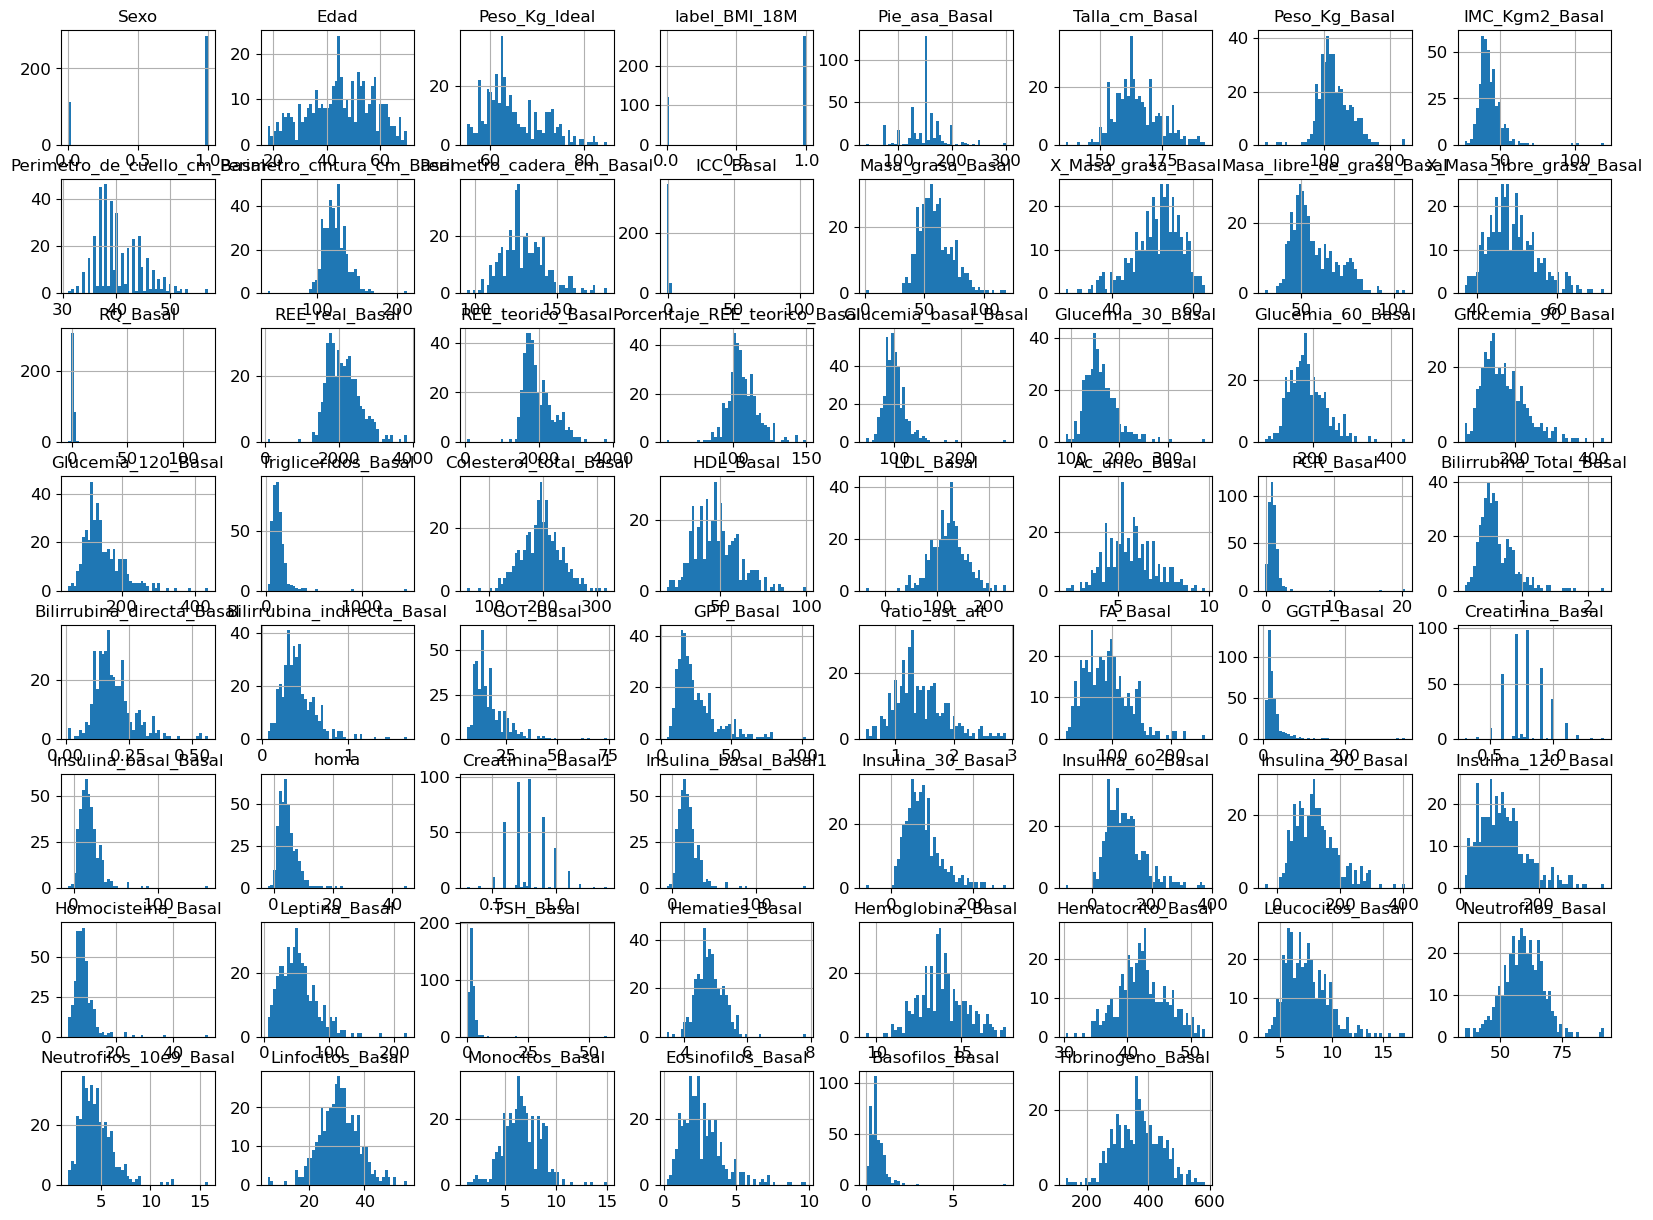

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Se pueden observar escalas muy diferentes entre las variables y colas pesadas en muchas variables. Para solucionar este problema se escalar las variables numéricas con **robust scaler**

In [6]:
#Eliminamos las variables binarias para escalar las numericas
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
dfr = df[binary_cols]
df = df.drop(binary_cols, axis=1)
columnas=df.columns

# Crea un objeto RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Escala las columnas seleccionadas
df = scaler.fit_transform(df)
df= pd.DataFrame(df,columns=columnas)
df = pd.concat([df, dfr], axis=1)
df['NG']=perf_enc[:,0]
df['IGT']=perf_enc[:,1]
df['T2D']=perf_enc[:,2]


Observamos si la variable a predecir está balanceada o no

In [7]:
BMI=df[['label_BMI_18M']]
coun=BMI.value_counts()
print(coun)
unbalanced_BMI=(coun[0]/(coun[1]+coun[0]))*100
print('La predición de fracaso es:',unbalanced_BMI,'% y la de éxito es:',(100-unbalanced_BMI),'%')


label_BMI_18M
1                277
0                122
Name: count, dtype: int64
La predición de fracaso es: 30.576441102756892 % y la de éxito es: 69.42355889724311 %


Observamos que la variable objetivo está desbalanceada.

Observamos el desbalanceado de la variable objetivo EWL

In [8]:
EWL=pd.read_csv('rygb_basedata_18M_ewl.csv')
EWL=EWL[['label_EWL_18M']]
coun=EWL.value_counts()
print(coun)
unbalanced_EWL=(coun[0]/(coun[1]+coun[0]))*100
print('La predición de fracaso es:',unbalanced_EWL,'% y la de éxito es: ',100-unbalanced_EWL,'%')

label_EWL_18M
1                251
0                148
Name: count, dtype: int64
La predición de fracaso es: 37.092731829573935 % y la de éxito es:  62.907268170426065 %


In [9]:
df_label=pd.concat([BMI,EWL],axis=1)
mask = (df_label['label_BMI_18M'] == 1) & (df_label['label_EWL_18M'] == 0)
count_1_0 = df_label.loc[mask, 'label_BMI_18M'].count()
print('BMI tiene ',count_1_0,' operaciones con exito que EWL califica como fracaso')
mask = (df_label['label_BMI_18M'] == 0) & (df_label['label_EWL_18M'] == 1)
count_0_1 = df_label.loc[mask, 'label_BMI_18M'].count()
print('EWL tiene ',count_0_1,' operaciones con exito que BMI califica como fracaso')
print('Discrepan en',count_1_0+count_0_1,'operaciones')


BMI tiene  41  operaciones con exito que EWL califica como fracaso
EWL tiene  15  operaciones con exito que BMI califica como fracaso
Discrepan en 56 operaciones


Se escogerá la variable EWL como variable objetivo ya que está más balanceada y en general es más restrictiva

Los algoritmos se calcularán maximizando la precisión de los negativos, así se evitará que se opere gente a la que seguro le irá mal la operación. Para ello cambiaremos la columna EWL. 1 representará fracaso, y el 0 representará éxito, ya que queremos maximizar la detección de fracasos.

In [10]:
EWL['label_EWL_18M'] = EWL['label_EWL_18M'].apply(lambda x: 1 if x == 0 else 0)


## 2. Separamos en tres datasets, uno con todas las variables (df), uno donde hemos quitado las que estan relacionadas entre si (df_sincorr), y uno con las componentes principales (df_pca).

Aplicamos una PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df)

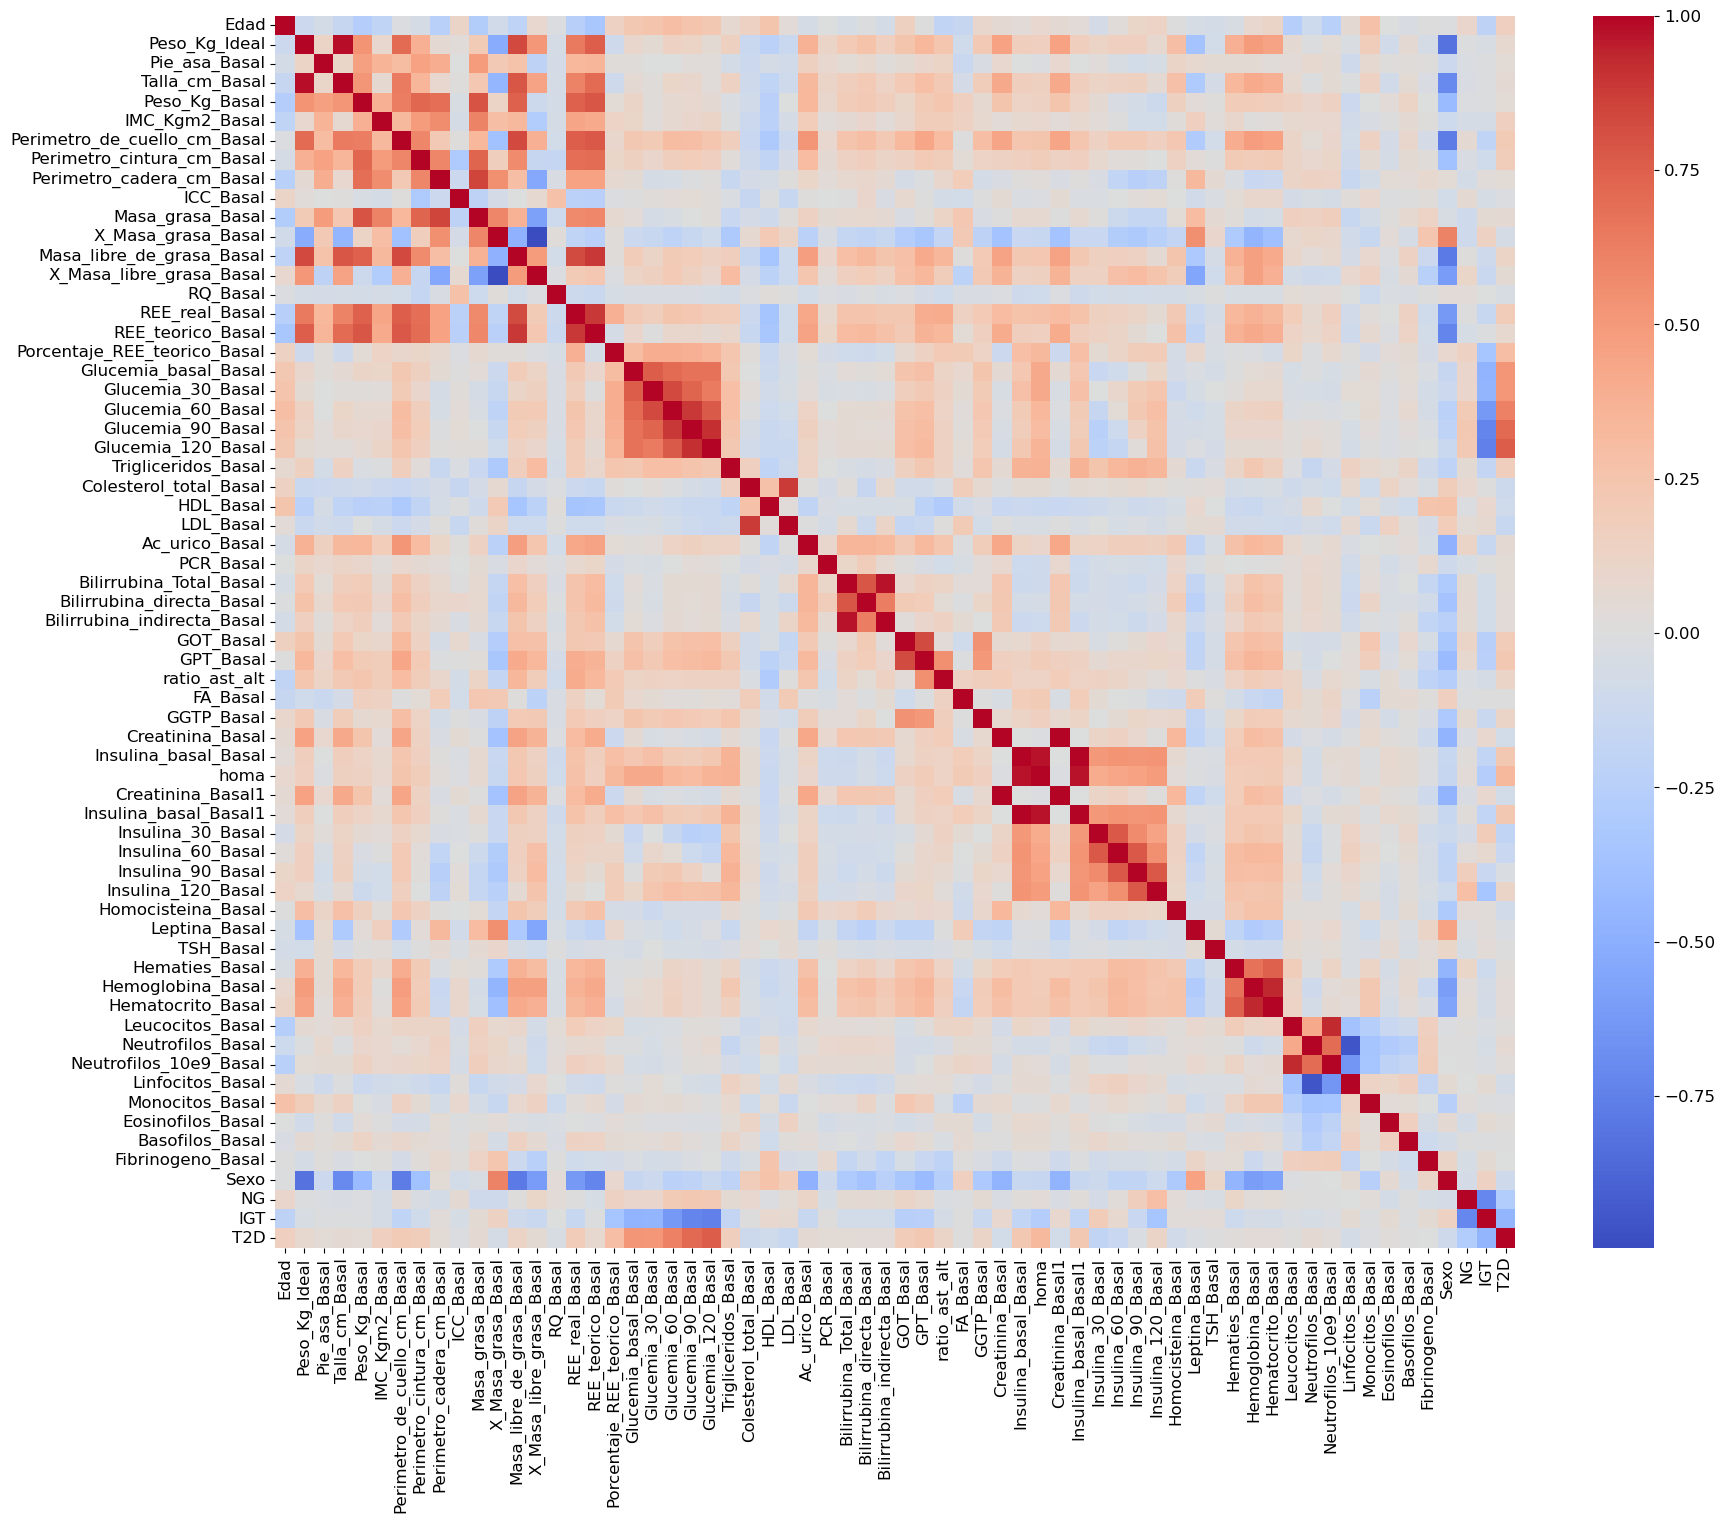

In [12]:

df.drop(['label_BMI_18M'],axis=1,inplace=True)
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()


to_drop = set()  # Conjunto para almacenar las columnas a eliminar

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

df_sincorr = df.drop(columns=to_drop)


# 3 Empezamos a generar y validar modelos.

Se realizará una predicción de del resultado de la operación mediante una regresión logística. Debido a que las clases están desbalanceadas, se le ha dado un mayor peso a la clase menor.

## 3.1 Se define una función para el Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score, auc,recall_score, precision_score,precision_recall_curve, average_precision_score

# Dividir los datos en conjuntos de entrenamiento y prueba
def logistic_regression(X,y,reg):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Crear y entrenar el modelo de regresión logística con validación cruzada
    model = LogisticRegressionCV(
        Cs=10,  # Valores de hiperparámetro C a probar (puedes ajustarlos según tus necesidades)
        cv=5,  # Número de divisiones en la validación cruzada
        solver='liblinear',  # Seleccionar un solver adecuado
        penalty=reg,
        class_weight='balanced' ,
        scoring='precision'
        
        
    )
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate recall and precision
    recallscore = recall_score(y_test, y_pred)
    precisionscore = precision_score(y_test, y_pred)

    print(f'Recall: {recallscore:.2f}')
    print(f'Precision: {precisionscore:.2f}')
    print(f'accuracy: {accuracy:.2f}')

    # Obtener las probabilidades predichas para la clase positiva (clase 1)
    y_scores = model.predict_proba(X_test)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Calcular el área bajo la curva (AUC)
    roc_auc = auc(fpr, tpr)
    
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    auc_pr = average_precision_score(y_test, y_scores)
    
    return recall,precision,accuracy,roc_auc,fpr,tpr,auc_pr,recallscore,precisionscore



# 3.1.1 Logistic Regression (df genérico)

Se hace la regresión con el dataset original con regularización lasso para eliminar variables.

In [14]:
recall,precision,accuracy,roc_auc,fpr,tpr,auc_pr,recallscore,precisionscore=logistic_regression(df,EWL,'l1')
bestrecall = recall
bestprecision = precision
bestaccuracy = accuracy
bestroc_auc = roc_auc
bestfpr = fpr
besttpr = tpr
bestauc_pr = auc_pr
bestrecallscore = recallscore
bestprecisionscore =precisionscore
id = 'Logistic Regression de df generico'


Recall: 0.44
Precision: 0.53
accuracy: 0.59


# 3.1.2 Logistic Regression (df sin correlaciones)

In [15]:
recall,precision,accuracy,roc_auc,fpr,tpr,auc_pr,recallscore,precisionscore=logistic_regression(df_sincorr,EWL,'l2')
if precisionscore > bestprecisionscore and recallscore > 0.3:
    bestrecall = recall
    bestprecision = precision
    bestaccuracy = accuracy
    bestroc_auc = roc_auc
    bestfpr = fpr
    besttpr = tpr
    bestauc_pr = auc_pr
    bestrecallscore = recallscore
    bestprecisionscore =precisionscore
    id ='Logistic Regression de df sin correlaciones'

Recall: 0.63
Precision: 0.55
accuracy: 0.62


# 3.1.3 Logistic Regression (PCA)

In [16]:
recall,precision,accuracy,roc_auc,fpr,tpr,auc_pr,recallscore,precisionscore=logistic_regression(df_pca,EWL,'l2')
if precisionscore > bestprecisionscore and recallscore > 0.3:
    bestrecall = recall
    bestprecision = precision
    bestaccuracy = accuracy
    bestroc_auc = roc_auc
    bestfpr = fpr
    besttpr = tpr
    bestauc_pr = auc_pr
    bestrecallscore = recallscore
    bestprecisionscore =precisionscore
    id ='Logistic Regression de df pca'

Recall: 0.72
Precision: 0.78
accuracy: 0.79


## 3.2 Definimos función del random Forest con GridSearch

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def train_and_evaluate_random_forest(df, y):
    # Divide el DataFrame en características (X) y la columna objetivo (y)
    X=df
    

    # Define el espacio de hiperparámetros a explorar
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # División de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Búsqueda de hiperparámetros
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='precision', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print("Mejores hiperparámetros:", best_params)

    # Predicciones y métricas
    y_pred = best_rf_model.predict(X_test)
    recallscore = recall_score(y_test, y_pred)
    precisionscore = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Recall: {recallscore:.2f}')
    print(f'Precision: {precisionscore:.2f}')
    print(f'Accuracy: {accuracy:.2f}')

    # Curva ROC
    y_scores = best_rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.2f}')
    
    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    auc_pr = average_precision_score(y_test, y_scores)
    return recall,precision,accuracy,roc_auc,fpr,tpr,auc_pr,recallscore,precisionscore
   

## 3.2.1 Random Forest con Grid Search (df genérico)


In [18]:
recall,precision,accuracy,roc_auc,fpr,tpr,auc_pr,recallscore,precisionscore=train_and_evaluate_random_forest(df,EWL)
if precisionscore > bestprecisionscore and recallscore > 0.3 :
    bestrecall = recall
    bestprecision = precision
    bestaccuracy = accuracy
    bestroc_auc = roc_auc
    bestfpr = fpr
    besttpr = tpr
    bestauc_pr = auc_pr
    bestrecallscore = recallscore
    bestprecisionscore =precisionscore
    id ='Random Forest de df generico'

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Recall: 0.30
Precision: 0.75
Accuracy: 0.70
AUC: 0.69


## 3.2.2 Random Forest con Grid Search (df sin correlaciones)

In [19]:
recall,precision,accuracy,roc_auc,fpr,tpr,auc_pr,recallscore,precisionscore=train_and_evaluate_random_forest(df_sincorr,EWL)
if precisionscore > bestprecisionscore and recallscore > 0.3 :
    bestrecall = recall
    bestprecision = precision
    bestaccuracy = accuracy
    bestroc_auc = roc_auc
    bestfpr = fpr
    besttpr = tpr
    bestauc_pr = auc_pr
    bestrecallscore = recallscore
    bestprecisionscore =precisionscore
    id ='Random Forest de df sin correlaciones'

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Recall: 0.37
Precision: 0.73
Accuracy: 0.71
AUC: 0.65


## 3.2.3 Random Forest con Grid Search (PCA)

In [20]:
recall,precision,accuracy,roc_auc,fpr,tpr,auc_pr,recallscore,precisionscore=train_and_evaluate_random_forest(df_pca,EWL)
if precisionscore > bestprecisionscore and recallscore > 0.3 :
    bestrecall = recall
    bestprecision = precision
    bestaccuracy = accuracy
    bestroc_auc = roc_auc
    bestfpr = fpr
    besttpr = tpr
    bestauc_pr = auc_pr
    bestrecallscore = recallscore
    bestprecisionscore =precisionscore
    id = 'Random Forest de df pca'

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Recall: 0.53
Precision: 0.89
Accuracy: 0.80
AUC: 0.81


## 3.3 Se define una función para aplicar el SVM

In [21]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc, precision_recall_curve, average_precision_score


def apply_svm(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.1, 1, 10]
    }
    grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
    grid.fit(X_train, y_train)

    print(
        "The best parameters are %s with a score of %0.2f"
        % (grid.best_params_, grid.best_score_)
    )

    # Calculate error train and test error
    cost = grid.best_params_
    cost = list(cost.values())

    svc = SVC(kernel=cost[1], C=cost[0],probability=True)
    scores = cross_val_score(svc, X_train, y_train,
                             cv=5, scoring= 'precision')
    ac_train = np.mean(scores)

    svc.fit(X_train, y_train)

    ypred = svc.predict(X_test)
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, ypred)

    # Calculate recall and precision
    recallscore = recall_score(y_test, ypred)
    precisionscore = precision_score(y_test, ypred)

    print(f'Recall: {recallscore:.2f}')
    print(f'Precision: {precisionscore:.2f}')
    print(f'accuracy: {accuracy:.2f}')

    # Obtener las probabilidades predichas para la clase positiva (clase 1)
    y_scores = svc.predict_proba(X_test)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Calcular el área bajo la curva (AUC)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    auc_pr = average_precision_score(y_test, y_scores)
    
    return recall, precision, accuracy, roc_auc, fpr, tpr, auc_pr,recallscore,precisionscore


## 3.3.1 SVM (df genérica)

In [22]:
recall, precision, accuracy, roc_auc, fpr, tpr, auc_pr,recallscore,precisionscore=apply_svm(df, EWL)
if precisionscore > bestprecisionscore and recallscore > 0.3 :
    bestrecall = recall
    bestprecision = precision
    bestaccuracy = accuracy
    bestroc_auc = roc_auc
    bestfpr = fpr
    besttpr = tpr
    bestauc_pr = auc_pr
    bestrecallscore = recallscore
    bestprecisionscore =precisionscore
    id = 'Support Vector Machine de df generico'

The best parameters are {'C': 10, 'kernel': 'linear'} with a score of 0.69
Recall: 0.33
Precision: 0.50
accuracy: 0.57


## 3.3.2 SVM (df sin correlaciones)

In [23]:
recall, precision, accuracy, roc_auc, fpr, tpr, auc_pr,recallscore,precisionscore=apply_svm(df_sincorr, EWL)
if precisionscore > bestprecisionscore and recallscore > 0.3:
    bestrecall = recall
    bestprecision = precision
    bestaccuracy = accuracy
    bestroc_auc = roc_auc
    bestfpr = fpr
    besttpr = tpr
    bestauc_pr = auc_pr
    bestrecallscore = recallscore
    bestprecisionscore =precisionscore
    id ='Support Vector Machine de df sin correlaciones'

The best parameters are {'C': 1, 'kernel': 'sigmoid'} with a score of 0.66
Recall: 0.02
Precision: 1.00
accuracy: 0.58


## 3.3.3 SVM (df PCA)

In [24]:
recall, precision, accuracy, roc_auc, fpr, tpr, auc_pr,recallscore,precisionscore=apply_svm(df_pca, EWL)
if precisionscore > bestprecisionscore and recallscore > 0.3:
    bestrecall = recall
    bestprecision = precision
    bestaccuracy = accuracy
    bestroc_auc = roc_auc
    bestfpr = fpr
    besttpr = tpr
    bestauc_pr = auc_pr
    bestrecallscore = recallscore
    bestprecisionscore =precisionscore
    id ='Support Vector Machine de df pca'

The best parameters are {'C': 0.1, 'kernel': 'linear'} with a score of 0.84
Recall: 0.79
Precision: 0.94
accuracy: 0.89


## 4. Visualización de los resultados

## Se define una función para hacer el plot de la curva ROC

In [25]:
# Dibujar la curva ROC

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()


## Se define una función para hacer el plot de la curva precision-recall


In [26]:
def plot_precision_recall_curve(recall, precision, auc_pr):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_pr:.2f})')
    plt.plot([1, 0], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('Curva precision-recall')
    plt.legend(loc='lower right')
    plt.show()



## 4.1 Se hace un plot de las curvas para el mejor modelo de todas las combinaciones basado en la precisión

El mejor modelo es:  Support Vector Machine de df pca
Recall: 0.79
Precision: 0.94
accuracy: 0.89


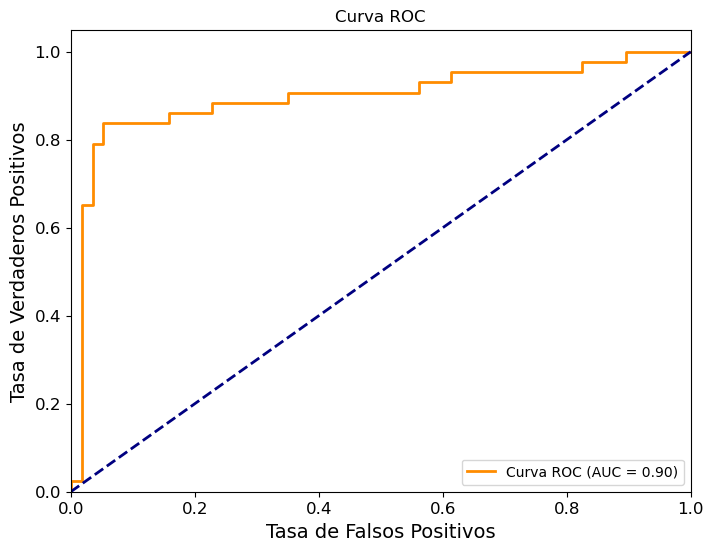

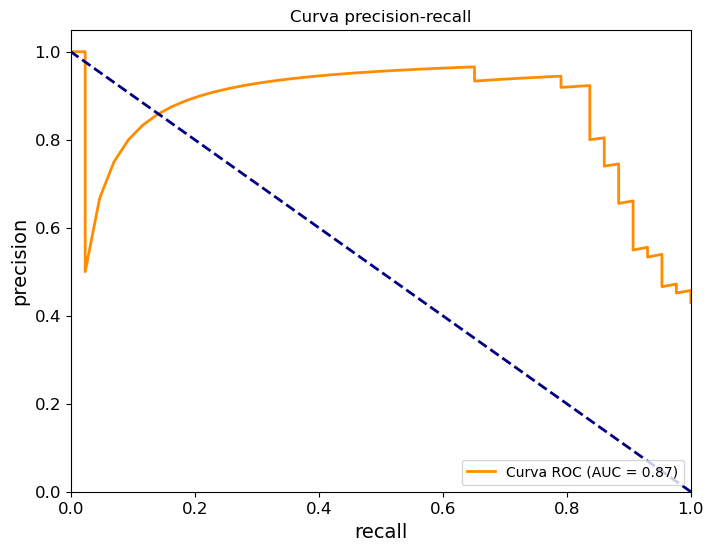

In [27]:

print( 'El mejor modelo es: ',id)
print(f'Recall: {bestrecallscore:.2f}')
print(f'Precision: {bestprecisionscore:.2f}')
print(f'accuracy: {bestaccuracy:.2f}')

plot_roc_curve(bestfpr, besttpr, bestroc_auc)
plot_precision_recall_curve(bestrecall, bestprecision, bestauc_pr)

